### EDA_Totales Accesos por rango.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Totales de accesos a internet desglosados por velocidad de conexión."**, que 
permite estudiar cómo se distribuyen los accesos según diferentes rangos de velocidad.

### Objetivo del Análisis
El propósito de este análisis es **evaluar el acceso a internet según la velocidad de conexión**, analizando la evolución 
del servicio y posibles brechas tecnológicas entre diferentes regiones.

In [3]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Totales Accesos por rango.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [4]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Hasta 512 Kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Otros', 'Total']


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 Kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   Otros                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB
None


In [6]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [7]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [8]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      42 non-null     int64 
 1   Trimestre                42 non-null     int64 
 2   Hasta 512 Kbps           42 non-null     int64 
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64 
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64 
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64 
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64 
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64 
 8   Más de 30 Mbps           42 non-null     int64 
 9   Otros                    42 non-null     int64 
 10  Total                    42 non-null     int64 
 11  Trimestre_Label          42 non-null     object
dtypes: int64(11), object(1)
memory usage: 4.1+ KB
None


In [9]:
import sweetviz as sv
from skimpy import skim

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      42 non-null     int64 
 1   Trimestre                42 non-null     int64 
 2   Hasta 512 Kbps           42 non-null     int64 
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64 
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64 
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64 
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64 
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64 
 8   Más de 30 Mbps           42 non-null     int64 
 9   Otros                    42 non-null     int64 
 10  Total                    42 non-null     int64 
 11  Trimestre_Label          42 non-null     object
dtypes: int64(11), object(1)
memory usage: 4.1+ KB
None
    Año  Trimestre  Hasta 512 Kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151  

In [11]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 42     │ │ int64       │ 11    │                                                          │
│ │ Number of columns │ 12     │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column        ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50     ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año           │  0 │    0 │    2019 │   3.075 │    2014 │    2016 │    2019 │     2021 │     2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre     │  0 │    0 │   2.452 │   1.131 │       1 │    1.25 │       2 │        3 │        4 │ ▇ ▇ ▇▇ │  │
│ │ Hasta 512     │  0 │    0 │   46760 │   48920 │    5675 │   29030 │   34960 │    41060 │   241700 │   ▇    │  │
│ │ Kbps          │    │      │         │         │         │         │         │          │          │        │  │
│ │ Entre 512     │  0 │    0 │  215600 │  192100 │   28520 │   69950 │  150300 │   279200 │   687600 │ ▇▃ ▂▁▁ │  │
│ │ Kbps y 1 Mbps │    │      │         │         │         │         │         │          │          │        │  │
│ │ Entre 1 Mbps  │  0 │    0 │ 3176000 │ 1552000 │  840200 │ 1693000 │ 3313000 │  4780000 │  5153000 │ ▇ ▅▅▂▇ │  │
│ │ y 6 Mbps      │    │      │         │         │         │         │         │          │          │        │  │
│ │ Entre 6 Mbps  │  0 │    0 │  915500 │  229400 │  289200 │  862300 │  978800 │  1059000 │  1245000 │ ▁▁▂▂▇▂ │  │
│ │ y 10 Mbps     │    │      │         │         │         │         │         │          │          │        │  │
│ │ Entre 10 Mbps │  0 │    0 │  884400 │  451600 │  101100 │  677400 │  793000 │  1023000 │  2068000 │ ▃▇▇▂▃▁ │  │
│ │ y 20 Mbps     │    │      │         │         │         │         │         │          │          │        │  │
│ │ Entre 20 Mbps │  0 │    0 │  478400 │  433400 │     345 │  135800 │  361200 │   592500 │  1689000 │ ▇▇▂▂▂▁ │  │
│ │ y 30 Mbps     │    │      │         │         │         │         │         │          │          │        │  │
│ │ Más de 30     │  0 │    0 │ 2910000 │ 3139000 │   11600 │   32910 │ 1408000 │  5761000 │  8364000 │ ▇▁▂▂▁▃ │  │
│ │ Mbps          │    │      │         │         │         │         │         │          │          │        │  │
│ │ Otros         │  0 │    0 │  154100 │  132500 │       0 │       0 │  176200 │   242200 │   414800 │ ▇▁▇▃▂▂ │  │
│ │ Total         │  0 │    0 │ 8781000 │ 1773000 │ 6273000 │ 7152000 │ 8721000 │ 10390000 │ 11630000 │ ▇▅▅▅▃▇ │  │
│ └───────────────┴────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA % ┃ shortest ┃ longest ┃ min ┃ max ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año  Trimestre  Hasta 512 Kbps  Entre 512 Kbps y 1 Mbps  \
count     42.000000  42.000000       42.000000                42.000000   
unique          NaN        NaN             NaN                      NaN   
top             NaN        NaN             NaN                      NaN   
freq            NaN        NaN             NaN                      NaN   
mean    2018.761905   2.452381    46756.595238            215615.285714   
std        3.074756   1.130560    48922.973593            192134.704593   
min     2014.000000   1.000000     5675.000000             28521.000000   
25%     2016.000000   1.250000    29027.750000             69951.750000   
50%     2019.000000   2.000000    34960.000000            150273.000000   
75%     2021.000000   3.000000    41057.500000            279159.250000   
max     2024.000000   4.000000   241713.000000            687619.000000   

        Entre 1 Mbps y 6 

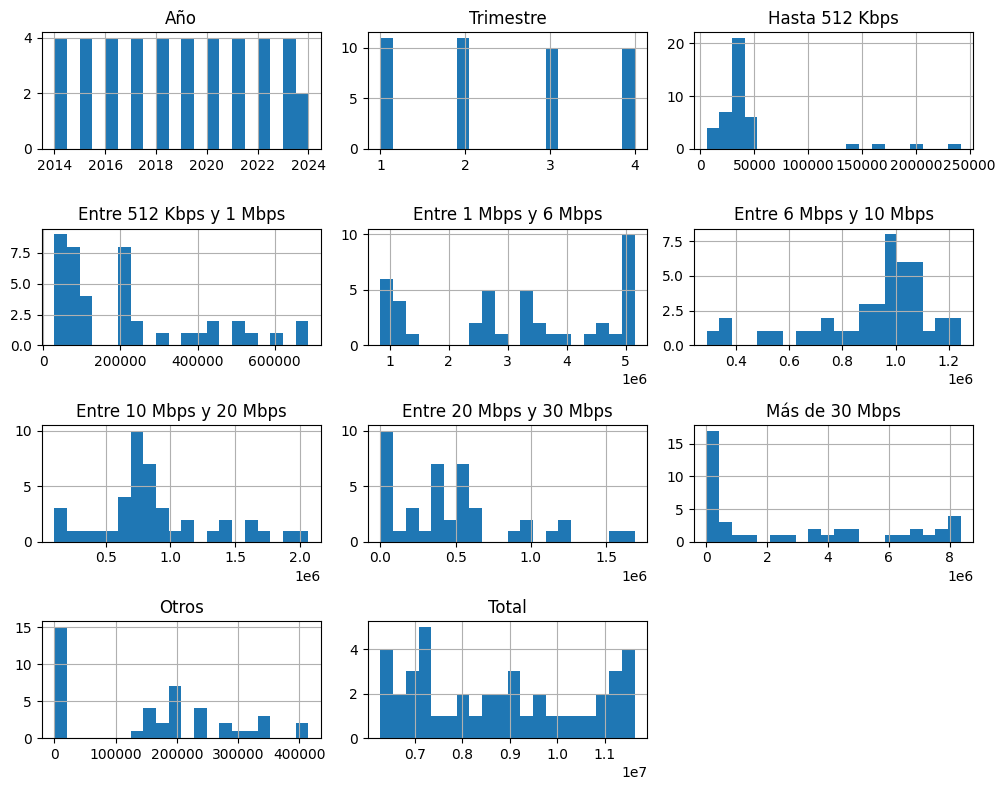

In [12]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

In [13]:
# Encontrar la fila con el valor máximo en la columna 'Total'
fila_max_accesos = df['Total'].idxmax()

# Obtener el trimestre y año correspondientes
trimestre_max_accesos = df.loc[fila_max_accesos, 'Trimestre_Label']
año_max_accesos = df.loc[fila_max_accesos, 'Año']

print(f"El trimestre con más accesos es {trimestre_max_accesos} del año {año_max_accesos}.")

El trimestre con más accesos es Q1 del año 2024.


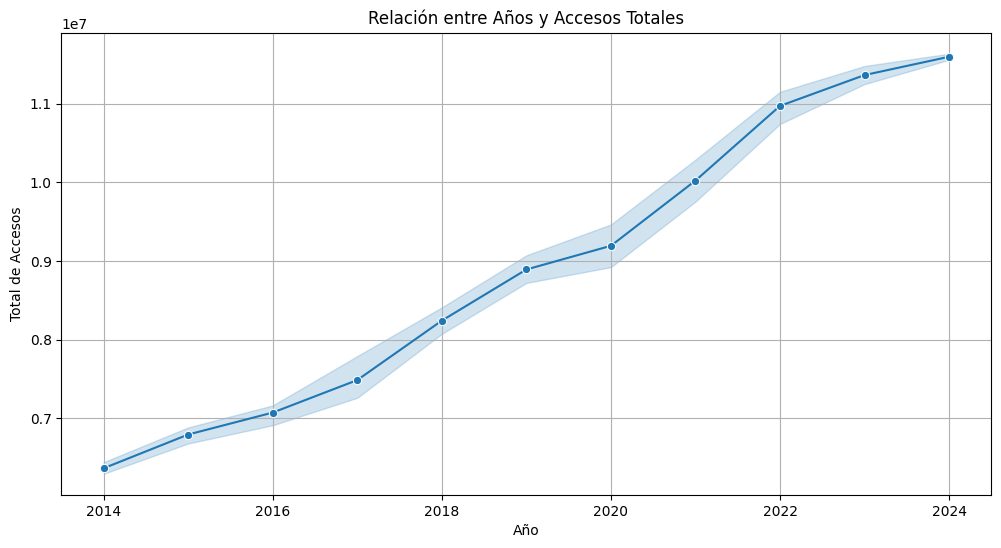

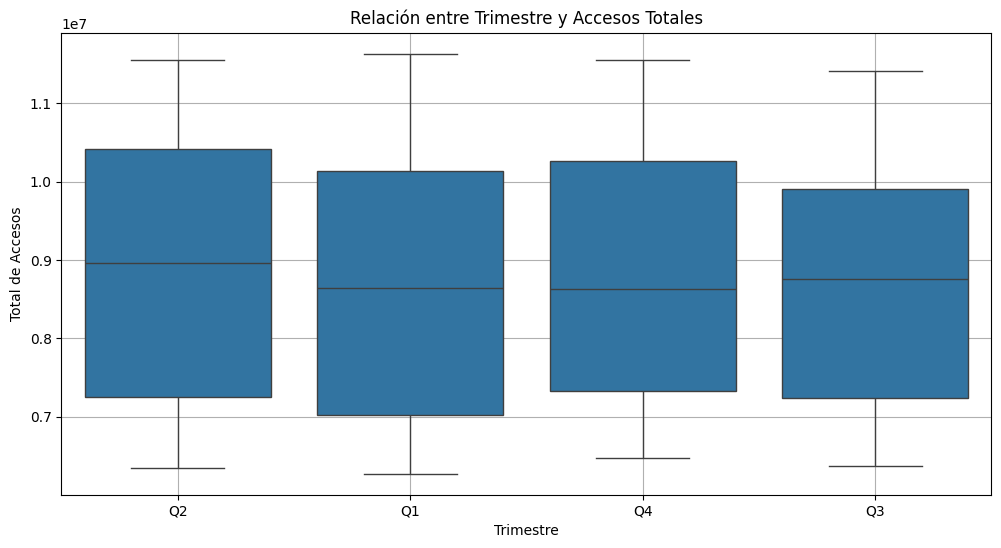

Tecnología con más acceso en cada año:
Año
2014    Total
2015    Total
2016    Total
2017    Total
2018    Total
2019    Total
2020    Total
2021    Total
2022    Total
2023    Total
2024    Total
dtype: object


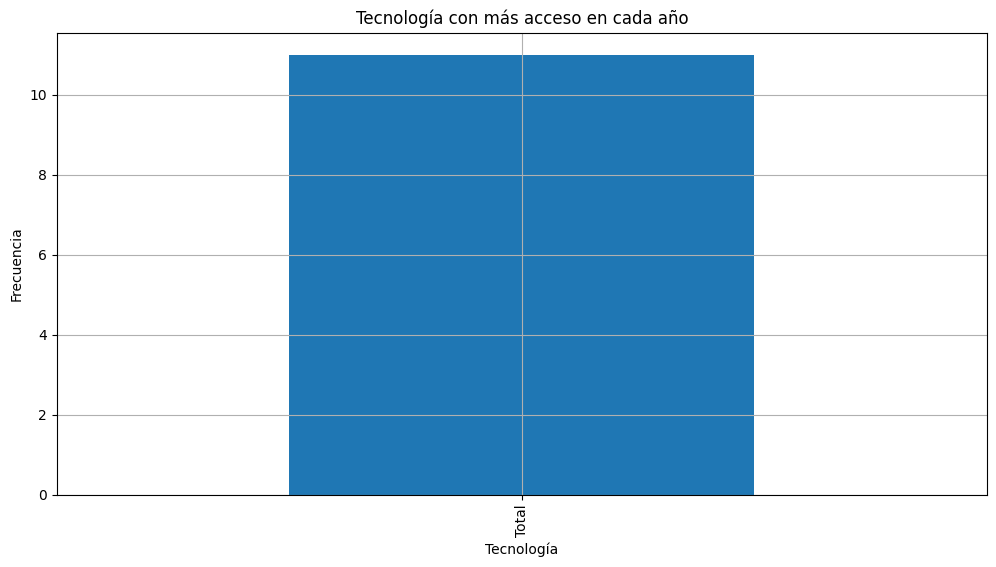

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Gráfica de la relación entre años y accesos
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Año', y='Total', marker='o')
plt.title('Relación entre Años y Accesos Totales')
plt.xlabel('Año')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.show()

# Gráfica de la relación entre trimestre y accesos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Trimestre_Label', y='Total')
plt.title('Relación entre Trimestre y Accesos Totales')
plt.xlabel('Trimestre')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.show()

# Tecnología con más acceso en cada año
tecnologias = ['Hasta 512 Kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Otros', 'Total']
max_acceso_por_ano = df.groupby('Año')[tecnologias].sum().idxmax(axis=1)

print("Tecnología con más acceso en cada año:")
print(max_acceso_por_ano)

# Graficar la tecnología con más acceso en cada año
plt.figure(figsize=(12, 6))
max_acceso_por_ano.value_counts().plot(kind='bar')
plt.title('Tecnología con más acceso en cada año')
plt.xlabel('Tecnología')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Matriz de correlación entre columnas numéricas:
                              Año  Trimestre  Hasta 512 Kbps  \
Año                      1.000000  -0.073505       -0.001661   
Trimestre               -0.073505   1.000000       -0.006068   
Hasta 512 Kbps          -0.001661  -0.006068        1.000000   
Entre 512 Kbps y 1 Mbps -0.865975  -0.086527       -0.099703   
Entre 1 Mbps y 6 Mbps   -0.977664  -0.008860        0.047988   
Entre 6 Mbps y 10 Mbps   0.748953   0.108016       -0.043408   
Entre 10 Mbps y 20 Mbps  0.115103   0.032846        0.018232   
Entre 20 Mbps y 30 Mbps  0.309049   0.099801        0.502356   
Más de 30 Mbps           0.941703  -0.002851       -0.095905   
Otros                    0.893975  -0.010735        0.090413   
Total                    0.986057   0.023592        0.017614   

                         Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  \
Año                                    -0.865975              -0.977664   
Trimestre                       

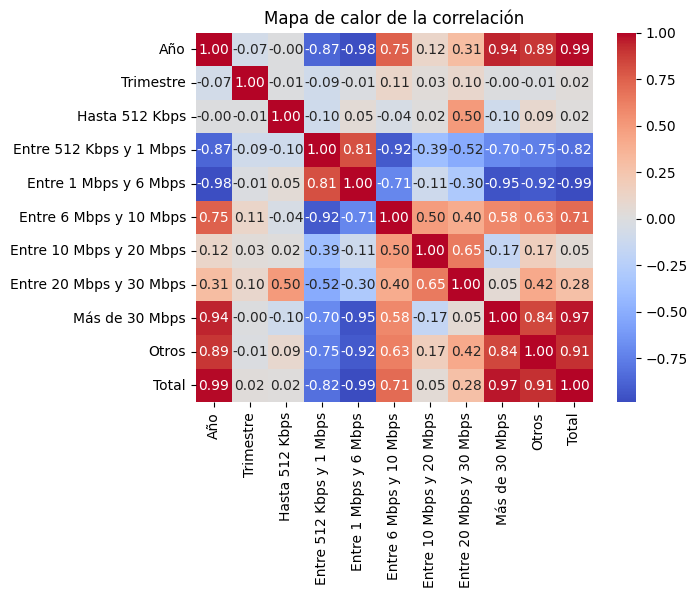

In [15]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [16]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [18]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
         Año  Trimestre  Hasta 512 Kbps  Entre 512 Kbps y 1 Mbps  \
0   1.724231  -0.404989       -0.384914                -0.782745   
1   1.724231  -1.300229       -0.371467                -0.770466   
2   1.395060   1.385490       -0.352702                -0.757892   
3   1.395060   0.490250       -0.340993                -0.711182   
4   1.395060  -0.404989       -0.329553                -0.717525   
5   1.395060  -1.300229       -0.316933                -0.703602   
6   1.065888   1.385490       -0.305678                -0.684533   
7   1.065888   0.490250       -0.284328                -0.626276   
8   1.065888  -0.404989       -0.270798                -0.611679   
9   1.065888  -1.300229       -0.245497                -0.583539   
10  0.736717   1.385490       -0.113673                -0.985570   
11  0.736717   0.490250       -0.136181                -0.917531   
12  0.736717  -0.404989       -0.136223                -0.914439   
13  0.73671

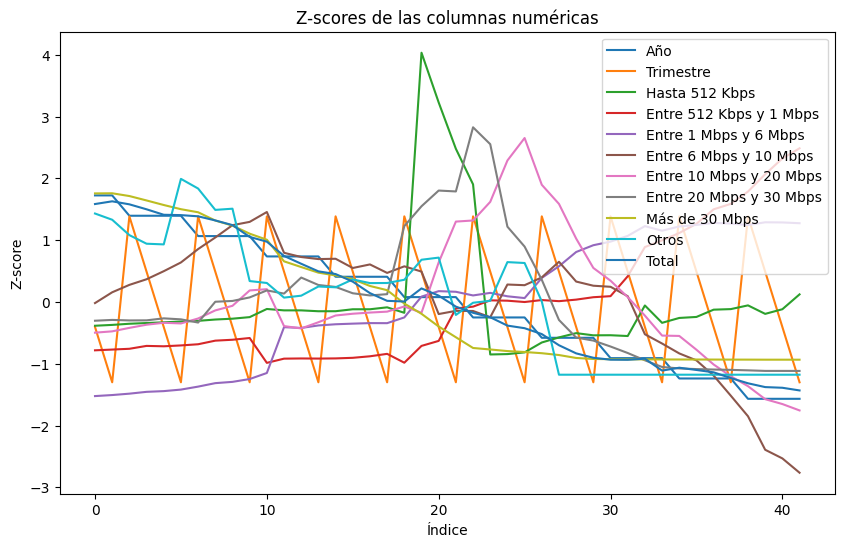

In [19]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [20]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    11
Q1    11
Q4    10
Q3    10
Name: count, dtype: int64


In [21]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


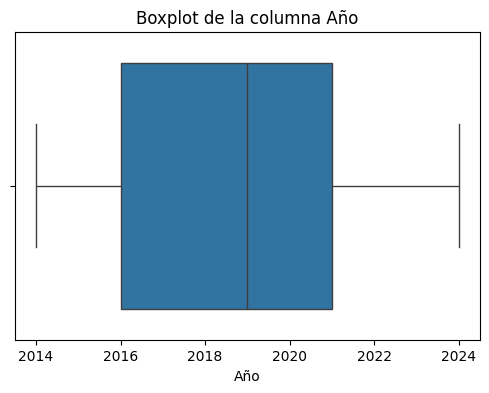

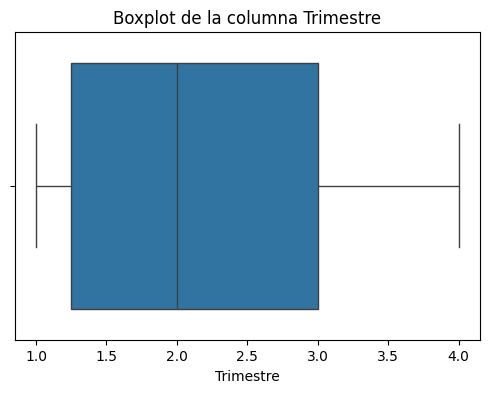

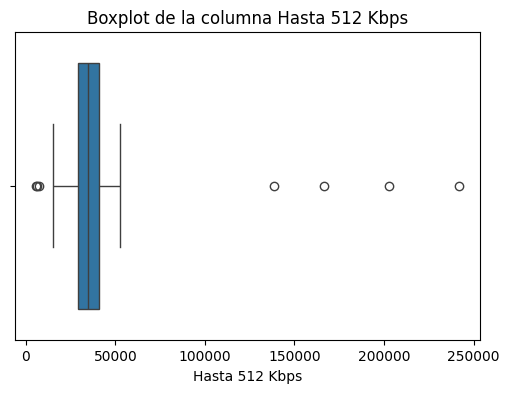

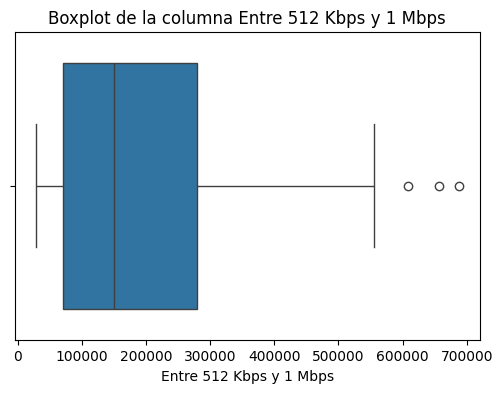

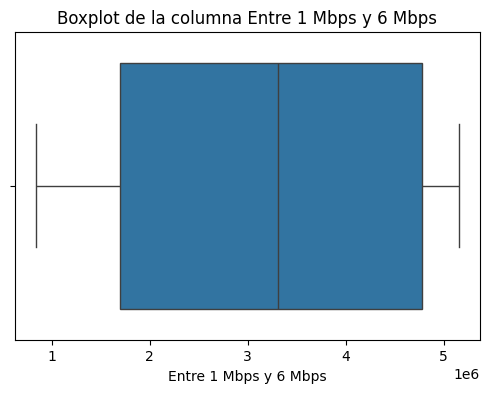

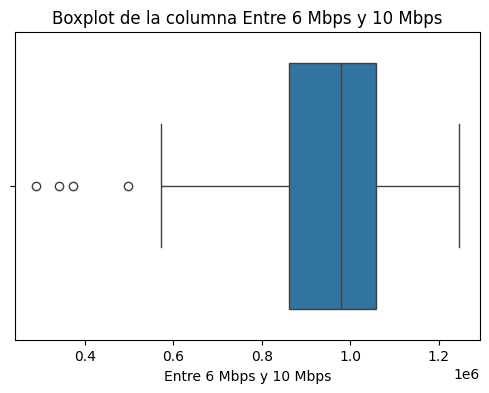

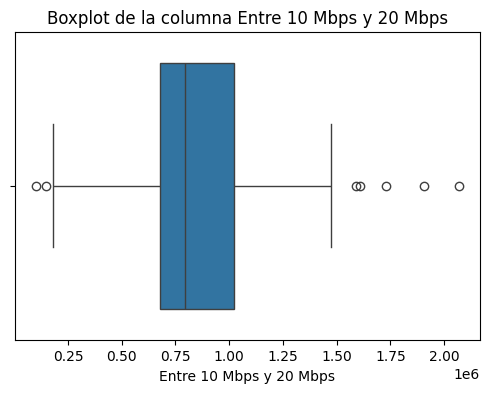

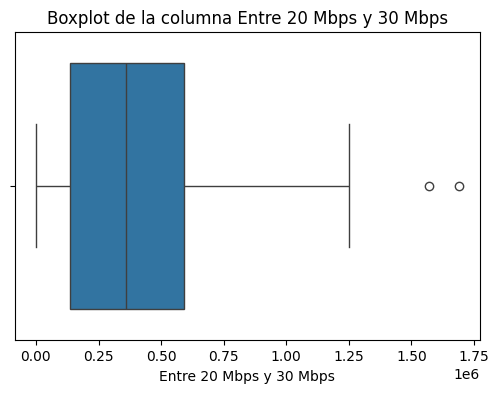

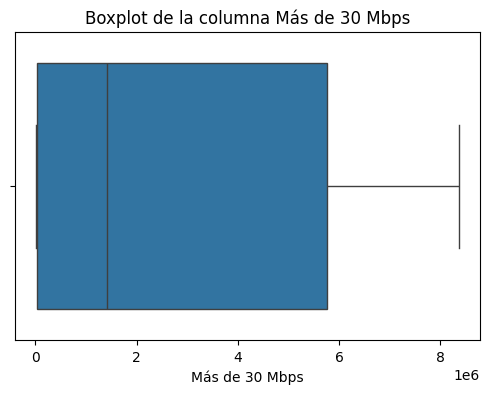

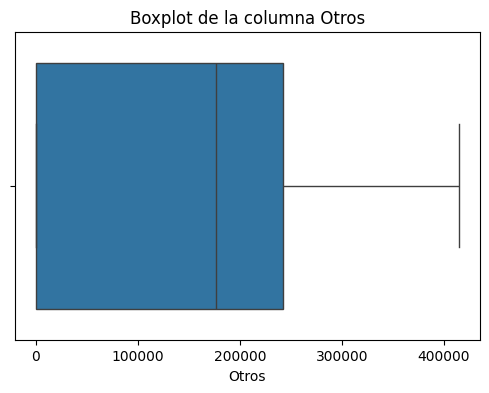

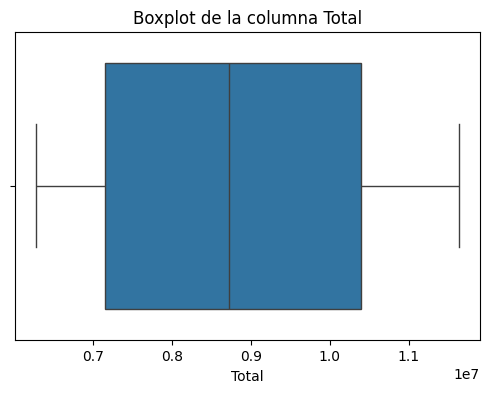

In [22]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [23]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                        0
Trimestre                  0
Hasta 512 Kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
Otros                      0
Total                      0
Trimestre_Label            0
dtype: int64


In [24]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [34]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Totales Accesos por rango.csv


In [26]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                        0.024172
Trimestre                  0.070729
Hasta 512 Kbps             2.916638
Entre 512 Kbps y 1 Mbps    1.084979
Entre 1 Mbps y 6 Mbps     -0.166518
Entre 6 Mbps y 10 Mbps    -1.289947
Entre 10 Mbps y 20 Mbps    0.770545
Entre 20 Mbps y 30 Mbps    1.105722
Más de 30 Mbps             0.575531
Otros                      0.147958
Total                      0.221127
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                       -1.186795
Trimestre                 -1.371727
Hasta 512 Kbps             8.238244
Entre 512 Kbps y 1 Mbps    0.055308
Entre 1 Mbps y 6 Mbps     -1.353750
Entre 6 Mbps y 10 Mbps     1.240613
Entre 10 Mbps y 20 Mbps    0.557800
Entre 20 Mbps y 30 Mbps    0.880793
Más de 30 Mbps            -1.297937
Otros                     -1.156481
Total                     -1.326602
dtype: float64


In [27]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                   Variable           VIF
0                     const  2.942158e+08
1                       Año  6.713369e+02
2                 Trimestre  8.595953e+00
3            Hasta 512 Kbps           inf
4   Entre 512 Kbps y 1 Mbps           inf
5     Entre 1 Mbps y 6 Mbps           inf
6    Entre 6 Mbps y 10 Mbps           inf
7   Entre 10 Mbps y 20 Mbps           inf
8   Entre 20 Mbps y 30 Mbps           inf
9            Más de 30 Mbps           inf
10                    Otros           inf
11                    Total           inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


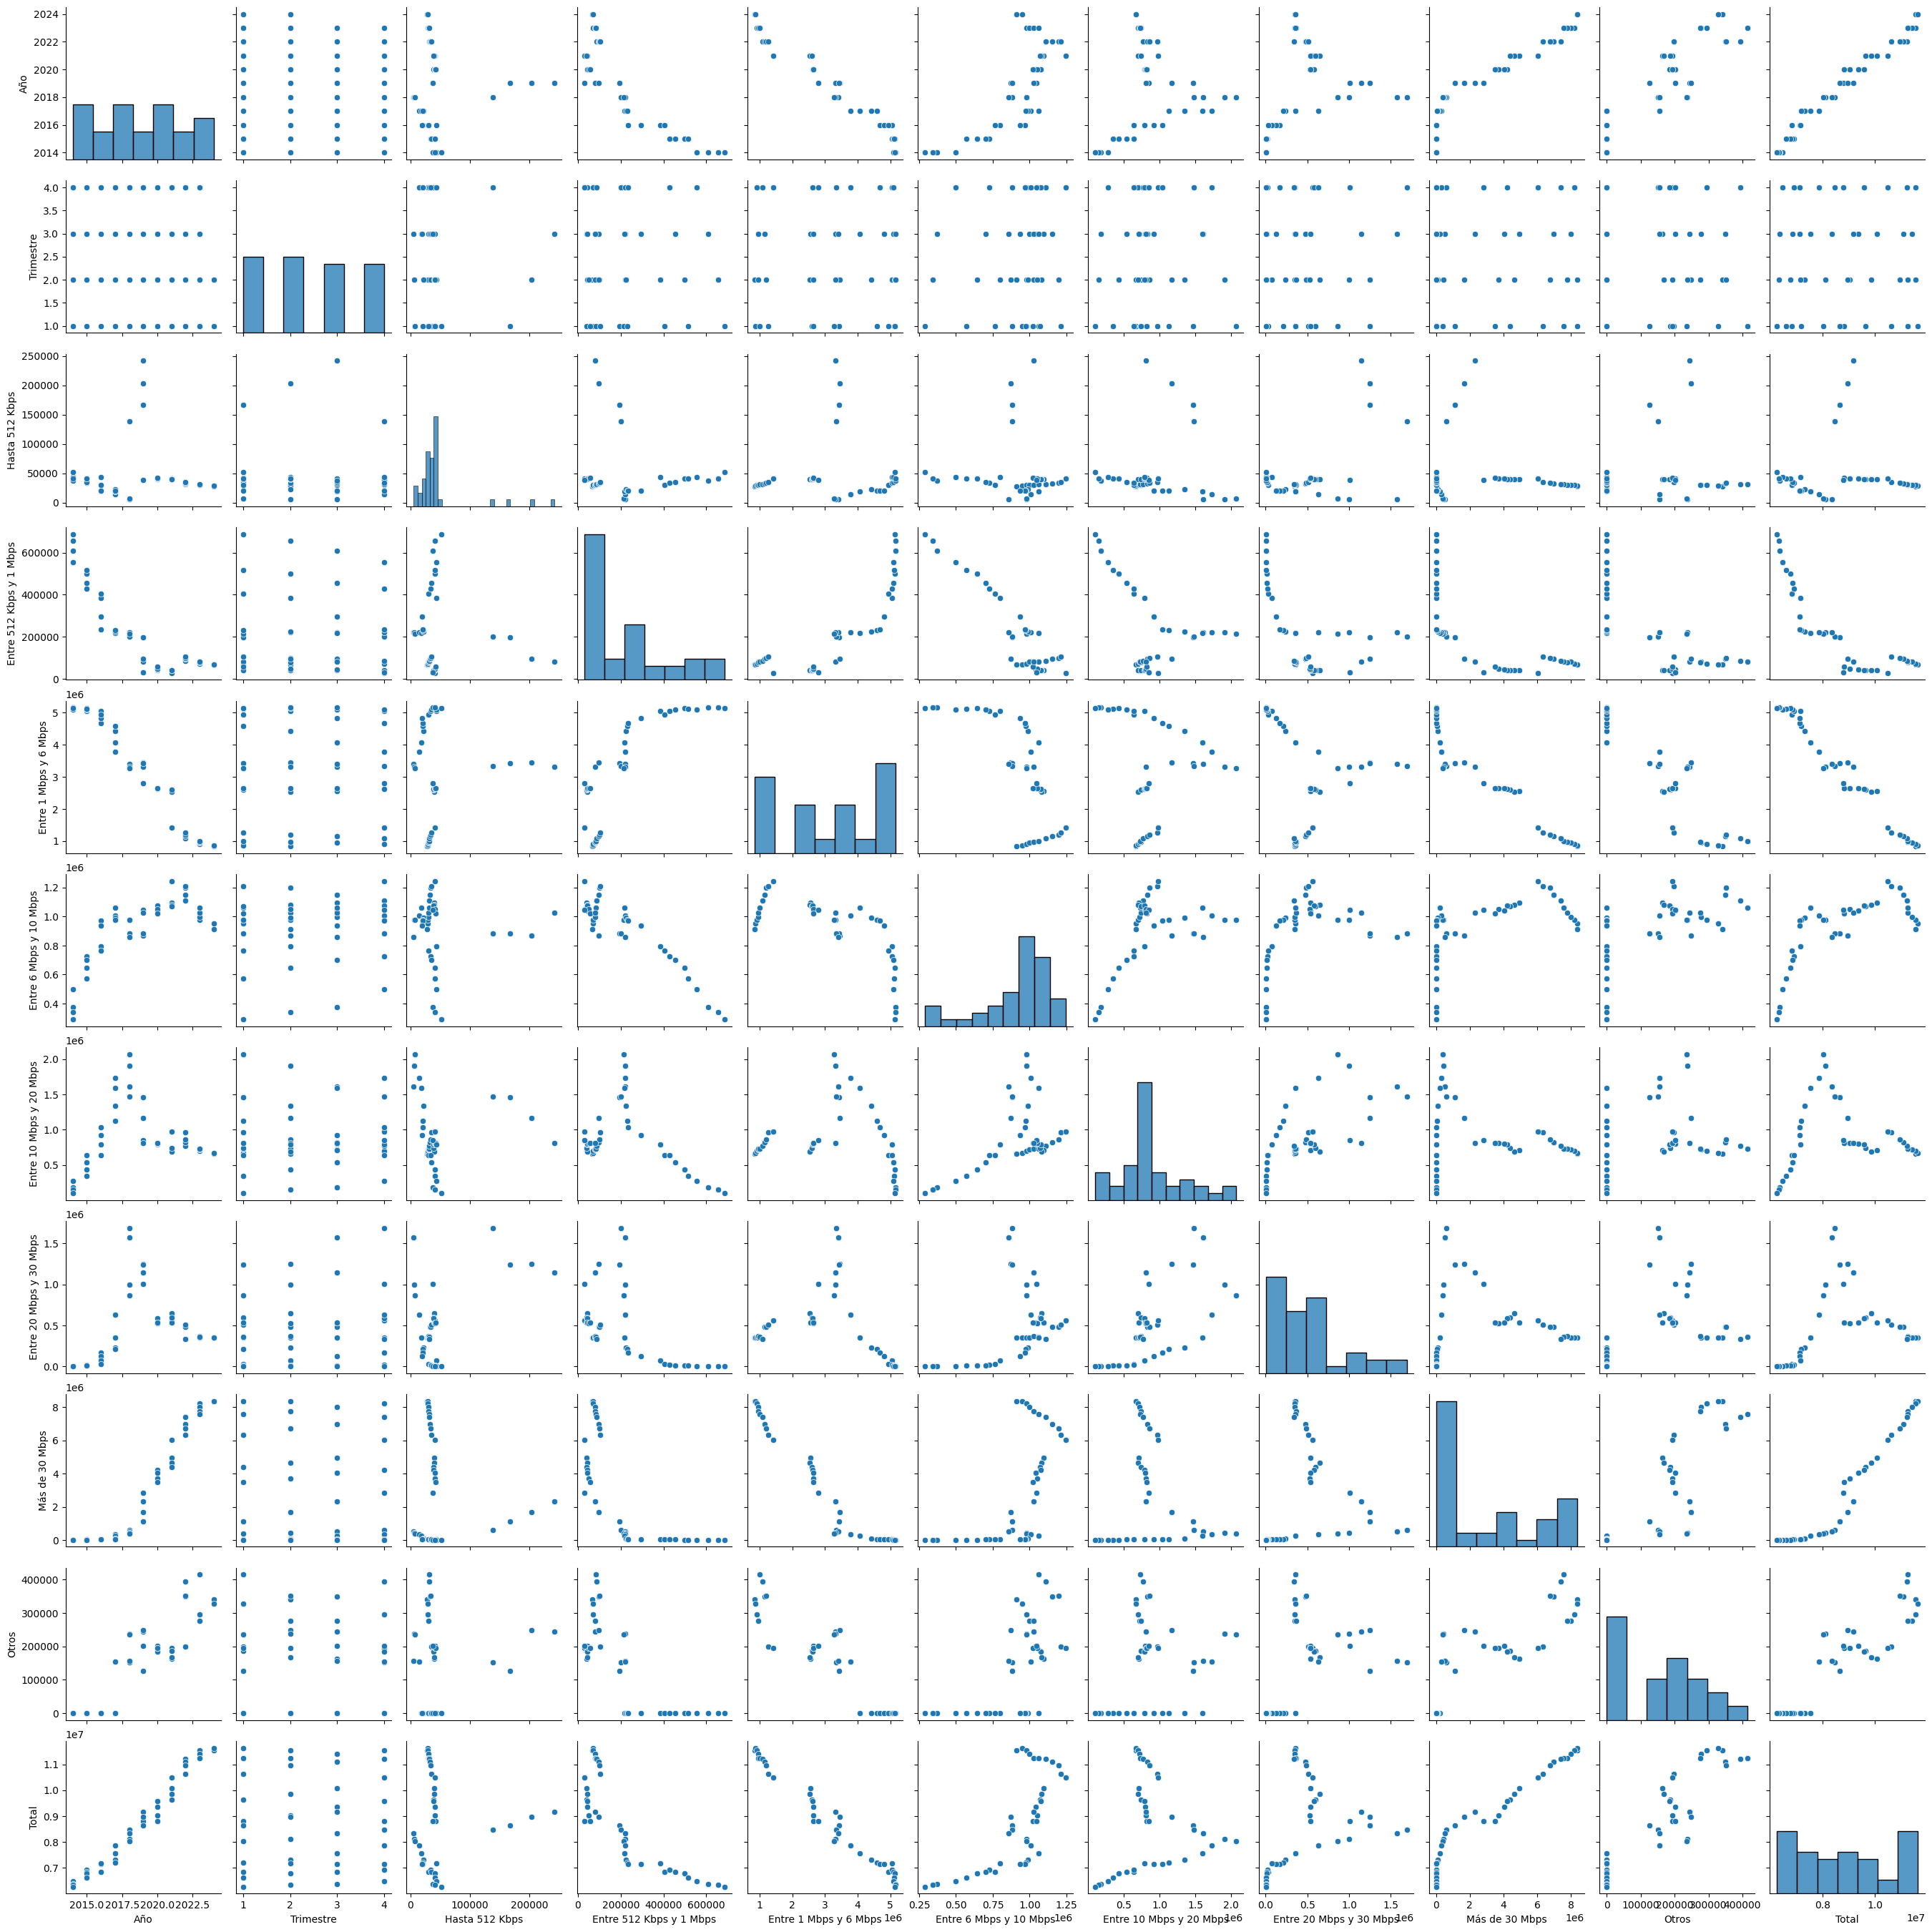

In [28]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [29]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Trimestre_Label':
                  Año                                                      \
                count    mean       std     min      25%     50%      75%   
Trimestre_Label                                                             
Q1               11.0  2019.0  3.316625  2014.0  2016.50  2019.0  2021.50   
Q2               11.0  2019.0  3.316625  2014.0  2016.50  2019.0  2021.50   
Q3               10.0  2018.5  3.027650  2014.0  2016.25  2018.5  2020.75   
Q4               10.0  2018.5  3.027650  2014.0  2016.25  2018.5  2020.75   

                        Trimestre       ...      Otros           Total  \
                    max     count mean  ...        75%       max count   
Trimestre_Label                         ...                              
Q1               2024.0      11.0  1.0  ...  217458.50  414754.0  11.0   
Q2               2024.0      11.0  2.0  ...  261969.00  351594.0  11.0   
Q3               2023.0      10.0  3.0  ... 

In [30]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Trimestre_Label':
                    Año  Trimestre  Hasta 512 Kbps  Entre 512 Kbps y 1 Mbps  \
Trimestre_Label                                                               
Q1               2019.0        1.0    45088.181818            236791.454545   
Q2               2019.0        2.0    48252.545455            219605.272727   
Q3               2018.5        3.0    50347.300000            214017.100000   
Q4               2018.5        4.0    43355.600000            189530.700000   

                 Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
Trimestre_Label                                                  
Q1                        3.168761e+06           888523.181818   
Q2                        3.154859e+06           899546.000000   
Q3                        3.312515e+06           924659.400000   
Q4                        3.072235e+06           953488.300000   

                 Entre 10 Mbps y 20 Mbps  Entre 20 Mbps y 30 Mbps  \
Trimestre_Lab

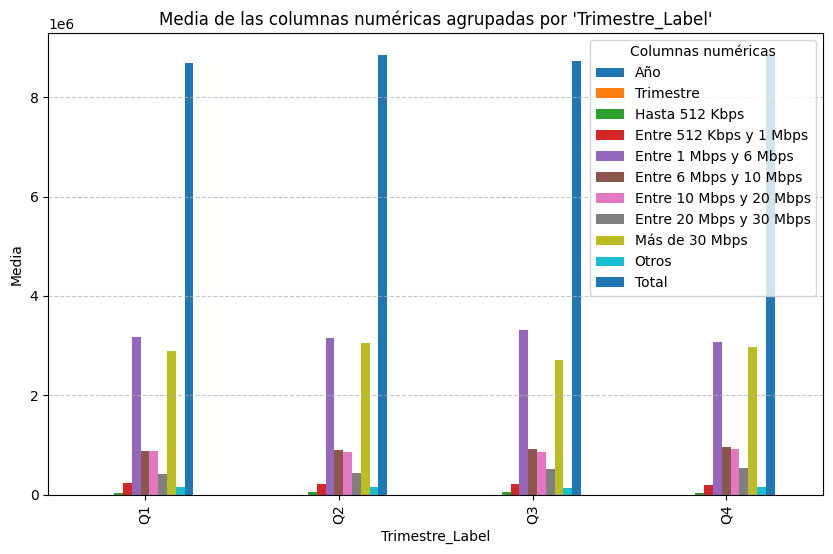

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_4892\3427093907.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))


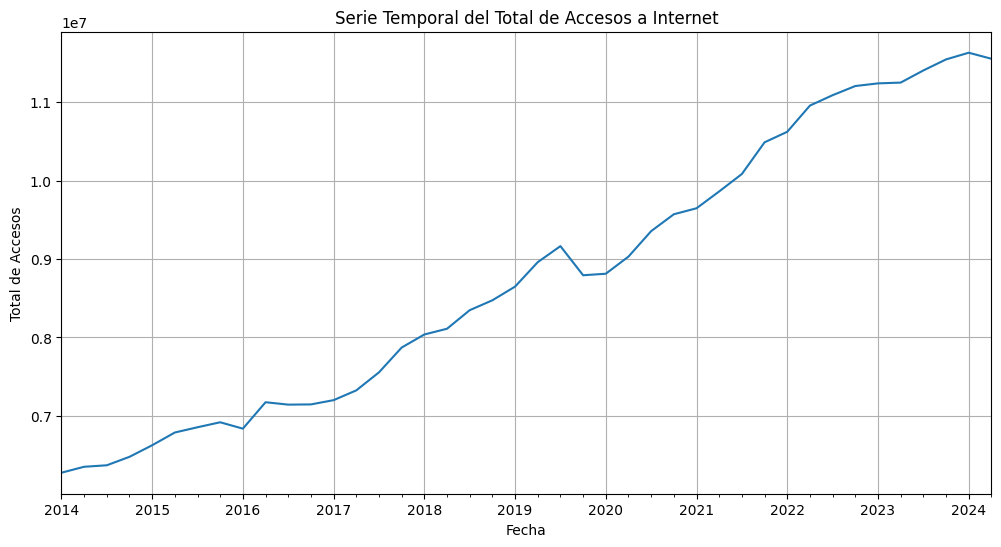

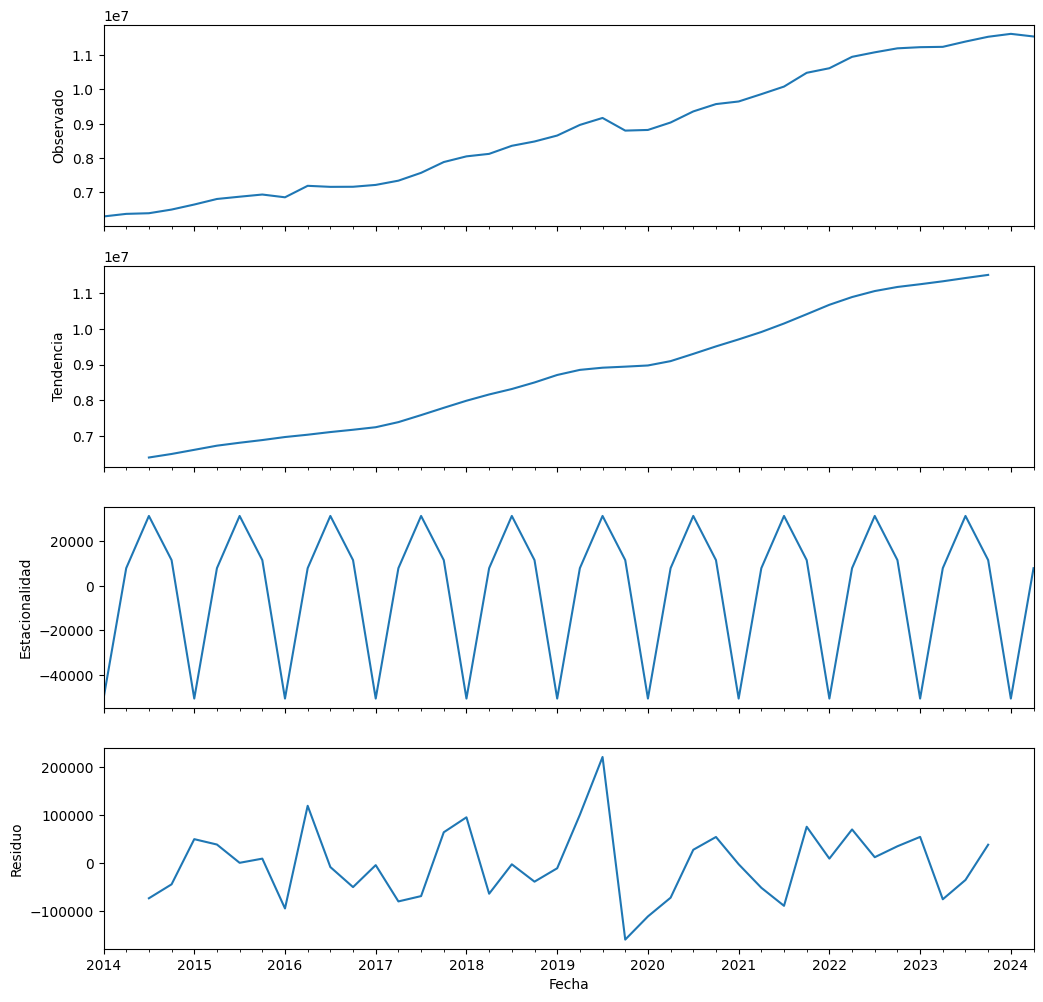

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Análisis de tendencias y estacionalidad

# Convertir las columnas 'Año' y 'Trimestre' en una columna de tipo datetime
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + 'Q' + df['Trimestre'].astype(str))

# Establecer la columna 'Fecha' como índice
df.set_index('Fecha', inplace=True)

# Graficar la serie temporal del total de accesos
plt.figure(figsize=(12, 6))
df['Total'].plot()
plt.title('Serie Temporal del Total de Accesos a Internet')
plt.xlabel('Fecha')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.show()

# Descomposición de la serie temporal

# Descomponer la serie temporal
descomposicion = seasonal_decompose(df['Total'], model='additive', period=4)

# Graficar la descomposición
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
descomposicion.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')
descomposicion.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia')
descomposicion.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad')
descomposicion.resid.plot(ax=ax4)
ax4.set_ylabel('Residuo')
plt.xlabel('Fecha')
plt.show()

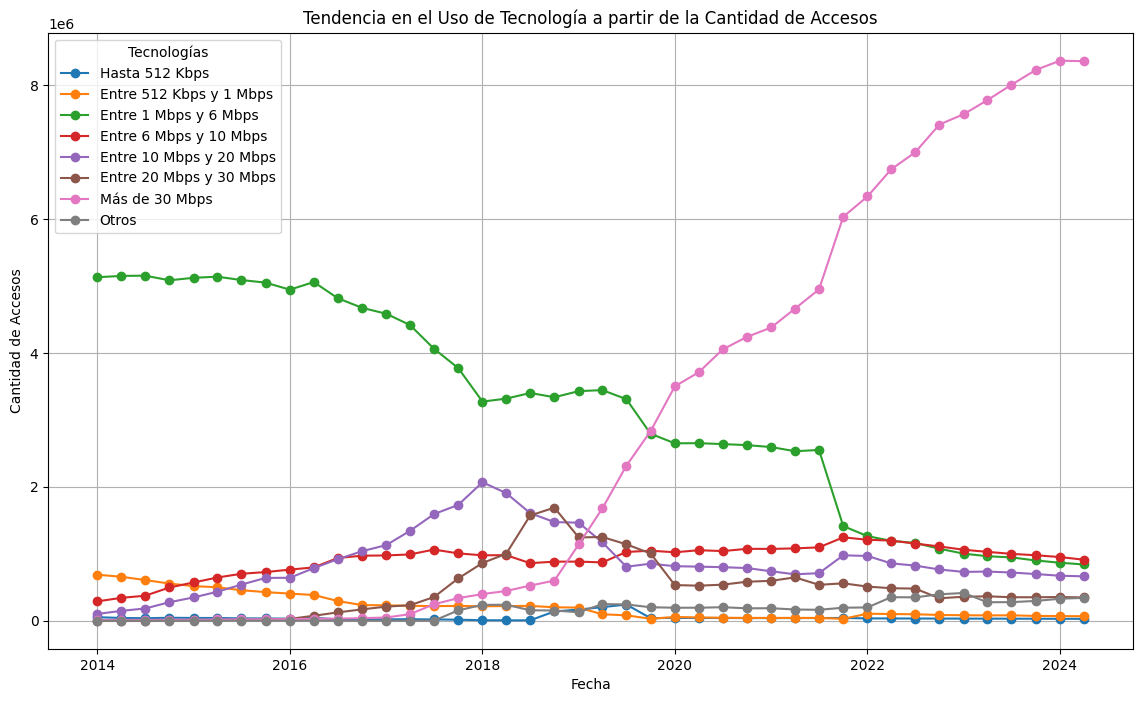

In [35]:
# Visualizar la tendencia en el uso de tecnología a partir de la cantidad de accesos

# Lista de tecnologías
tecnologias = ['Hasta 512 Kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'Otros']

# Graficar la tendencia de cada tecnología a lo largo del tiempo
plt.figure(figsize=(14, 8))
for tecnologia in tecnologias:
    plt.plot(df.index, df[tecnologia], marker='o', label=tecnologia)

plt.title('Tendencia en el Uso de Tecnología a partir de la Cantidad de Accesos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Accesos')
plt.legend(title='Tecnologías')
plt.grid(True)
plt.show()

# Análisis Exploratorio de Datos: Accesos a Internet por Rango de Velocidad

## Introducción

Este proyecto realiza un análisis exploratorio de datos (EDA) sobre los accesos a internet en Argentina, desglosados por velocidad de conexión. Los datos provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo regulador de las telecomunicaciones en el país.

## Descripción del Conjunto de Datos

El conjunto de datos utilizado en este análisis se centra en la hoja de datos **"Totales de accesos a internet desglosados por velocidad de conexión."**. Este dataset permite estudiar cómo se distribuyen los accesos según diferentes rangos de velocidad.

## Objetivo del Análisis

El propósito de este análisis es **evaluar el acceso a internet según la velocidad de conexión**, analizando la evolución del servicio y posibles brechas tecnológicas entre diferentes regiones.

## Contenido del Notebook

1. **Carga y Normalización de Datos:**
    - Carga del archivo CSV.
    - Normalización de los nombres de las columnas.

2. **Exploración Inicial:**
    - Extracción y visualización de los nombres de las columnas.
    - Información básica del DataFrame.

3. **Transformaciones y Limpieza:**
    - Conversión de la columna "Trimestre" a tipo `int64`.
    - Creación de la columna `Trimestre_Label` con etiquetas descriptivas.

4. **Análisis Descriptivo:**
    - Estadísticas descriptivas para columnas numéricas y categóricas.
    - Histogramas de las columnas numéricas.

5. **Análisis de Accesos:**
    - Identificación del trimestre y año con más accesos.
    - Gráficas de la relación entre años, trimestres y accesos totales.
    - Identificación de la tecnología con más acceso en cada año.

6. **Análisis de Correlación:**
    - Matriz de correlación entre columnas numéricas.
    - Mapas de calor para visualizar la correlación.

7. **Análisis de Valores Atípicos y Nulos:**
    - Identificación de columnas con valores negativos.
    - Visualización de valores atípicos con gráficos de caja.
    - Conteo de valores nulos por columna.

8. **Análisis de Distribuciones:**
    - Cálculo de Z-scores para columnas numéricas.
    - Visualización de Z-scores.

9. **Análisis de Tendencias y Estacionalidad:**
    - Descomposición de la serie temporal del total de accesos.
    - Visualización de la tendencia en el uso de tecnología a lo largo del tiempo.

10. **Verificación de Multicolinealidad:**
     - Cálculo del Factor de Inflación de la Varianza (VIF) para variables numéricas.

11. **Agrupamiento y Estadísticas por Categorías:**
     - Estadísticas descriptivas agrupadas por columnas categóricas.
     - Visualización de estadísticas agrupadas.

12. **Verificación de Duplicados:**
     - Conteo de filas duplicadas en el DataFrame.

## Requisitos

- Python 3.x
- Pandas
- NumPy
- Matplotlib
- Seaborn
- Sweetviz
- Skimpy
- Statsmodels
- Scipy

## Cómo Usar

1. Clona este repositorio.
2. Asegúrate de tener instaladas todas las dependencias mencionadas en la sección de requisitos.
3. Ejecuta el Jupyter Notebook `EDA_Totales_Accesos_por_rango.ipynb`.

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre un issue o envía un pull request para mejorar este proyecto.

## Licencia

Este proyecto está bajo la Licencia MIT. Consulta el archivo `LICENSE` para más detalles.